<a href="https://colab.research.google.com/github/shuken1019/Python25study/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#이번에는 겨울에 대방어철로 대방어 주문이 크게 늘어서
#MBC마켓에서 업계최초로 대방어를 무게 단위로 판매하려 함.
#무게 단위로 판매를 하면 가격 측정도 원활하고
#고객도 합리적으로 판단을 할 수 있다.
#그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도 있다.

#대방어의 무게를 재 측정해야 한다.
#다른 데이터는 정상범위가 있으니 예측할 수 있을까?
#이렇게 예측하는 것을 회귀라고 한다.
#샘플데이터가 필요하겠군!
#외부에서 56개의 샘플을 받아서 처리해보자
#지도학습은 크게 2가지로 나누어짐
#분류(2진분류): from sklearn.neighbors import KNeighborsClassifier
#회귀(예측: 확률(임의의 어떤 숫자로 예측))
#             :from sklearn.neighbors import KNeighborsRegressor
#회귀: 두 변수 사이에 상관관계를 분석하는 방법


In [ ]:
#리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
#차트에 한글처리용
!sudo apt-get install-y fonts-nanum   #!sudo 가상머신 명령어 처리 (권리자권환)
!sudo fc-cache -fv
!rm~/.cache/matplotlib-rf #설치 후에 세션 다시시작!

E: Invalid operation install-y
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
/bin/bash: line 1: rm~/.cache/matplotlib-rf: No such file or directory


In [ ]:
# 대방어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

기초자료


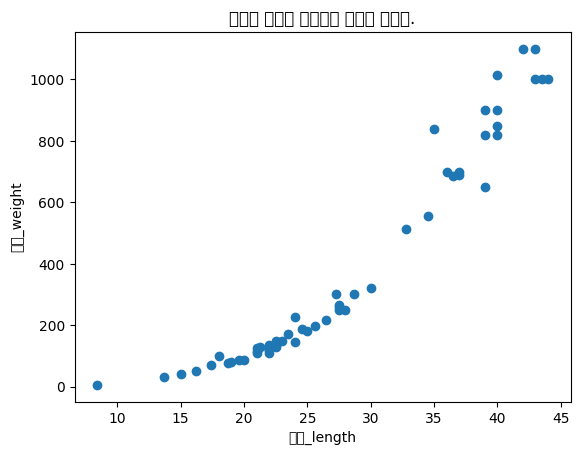

In [13]:

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글처리

plt.scatter(perch_length, perch_weight) # 농어의길이(x축), 농어의무게(y축)
plt.xlabel('농어_length')
plt.ylabel('농어_weight')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남.')
plt.show()

# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련(.fit)과 테스트(.score)를 진행해보자.

In [ ]:
#k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor
#예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
#이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
#k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
#회귀는 샘플에 가장 가까운 샘플 k개를 선택
#타깃값 100,80,60을 더해 3으로 나눈 평균이 타깃 값으로 사용됨.

In [ ]:
#사이킷런에서 제공하는 훈련세트, 테스트세트 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42) #1줄로 쓸것을 권장함
                                                                    #   input         target
#stratify 사용하지 않음(분류용)->정답파일이 무게 확율이기 때문에
#사이킷 런의 train_test_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
#random_state=42 서로 같은 테스트를 위한 시드값 제공
#사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용함
#perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열임
#[3,]->[3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서드 활용(4,)->(2,2)


In [ ]:
test_array =np.array([1,2,3,4])
print(test_array.shape)#현재 1차원 배열로 나오는데 이것을 억지로 2차원 배열 처리 해야함.

(4,)


In [ ]:
#2차원 배열로 변환
test_array = test_array.reshape(2,2)
print(test_array.shape)
#전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었지만
#이번에는 특성이 1개로 수동으로 2차원 배열을 만들어야 함. ->넘파이.reshape()를 활용
#(4,)->(2,2) 크기로 바꿔줌

(2, 2)


In [ ]:
print(test_array)

[[1 2]
 [3 4]]


In [ ]:
#입력데이터인 train_input과 test_input을 2차원 배열로 바꿔야함.
#train_input(42,)->train_input.reshape(42,1)
#넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공(-1)값을 넣으면 된다.
#(암기)
train_input=train_input.reshape(-1,1)#-1지정하면 원소 개수로 모두 채우라는 의미
                                    #1은 두번째 크기를 1로
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)#-1을 사용하면 매번 원소의 크기를 외우지 않아도 됨


(42, 1) (14, 1)


In [ ]:
print(train_input)#전처리 끝

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [ ]:
#훈련시작
from sklearn.neighbors import KNeighborsRegressor #회귀 알고리즘용 구현 클래스(리그레스)
#from sklearn.neighbor import KNeighborsClassifier #분류용
knr=KNeighborsRegressor() #회귀용 객체생성
#k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input,train_target) #회귀용으로 훈련
#       대방어길이 대방어무게

KNeighborsRegressor()

In [15]:
knr.score(test_input, test_target)
#       방어 테스트길이, 테스트 무게
#분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도)->예측값
#R^2=1=((타깃-예측)^2의 합)/((타깃-평균)^2의 합)임
#타깃의 평균 정도를 예측하는 수준 ->R^2 는 0에 가까워 지고, 예측이 타깃에 가까워지면 1에 가까운 값
#결과 99.28%로 예측 가능한 수준

0.992809406101064

In [17]:
knr.predict([[30]]) #알고 싶은값 출력 15cm->60g
#k최근접한 5개의 이웃에 대한 값을 99.28% 확률로 나온 결과 (60g)

array([311.4])

In [18]:
#sklearn.metrics패키지 아래 여러가지 측정도구를 제공함.
#mean_absolute_error 절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error #평균으로 절대값의 오차를 찾는 메서드
#테스트 세트에 대한 예측(prediction)을 만듭니다.
test_prediction =knr.predict(test_input)
mae= mean_absolute_error(test_target, test_prediction)
#테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
print(mae)
#19g정도 타깃값과 다르다(타깃과 에측한 값 사이의 차이)

19.157142857142862


In [19]:
knr.score(test_input, test_target)
#테스트 세트로 평가를 돌려보면 99.28% 정도 나옴

0.992809406101064

In [20]:
#위 결과를 보면 모델을 훈련세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
#이 모델을 훈련세트와 테스트세트에서 평가하면 두 값중에 어느것이 높을까?
#보통 훈련세트의 점수가 조금 더 높게 나옴
#훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 함.
#과소 적합; 훈련세트보다 테스트세트가 점수 높아???, 두 점수가 모두 낮은 경우

In [22]:
#사이킷런의 알고리즘 기본값을 3개로 조절 해보자.
#사이킷런의 k-최근접이웃 기본값이 5인데 이것을 3으로 변경
#이웃의 개수를 3으로 설정합니다.
knr.n_neighbors=3
#모델을 다시 훈련합니다.
knr.fit(train_input, train_target) #3개의 이웃용 생성 훈련
print(knr.score(train_input, train_target)) #훈련점수 보기 98.04%


0.9804899950518966


In [23]:
knr.predict([[15]]) #알고싶은 값 출력 15cm->47.33333333
#5개의 이웃을 참고하는 것보다. 3개를 참고하는 것이 더 좋은 결과가 나옴.

array([47.33333333])

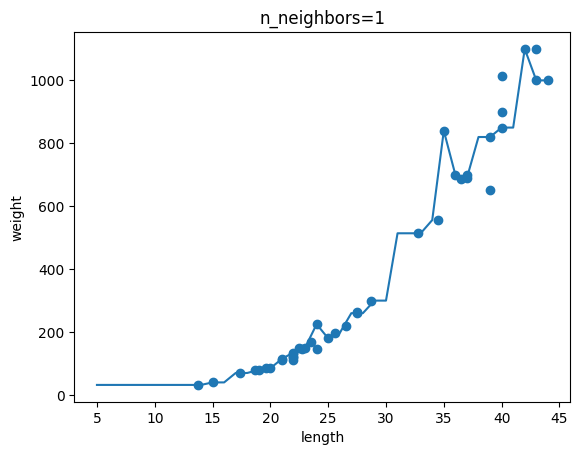

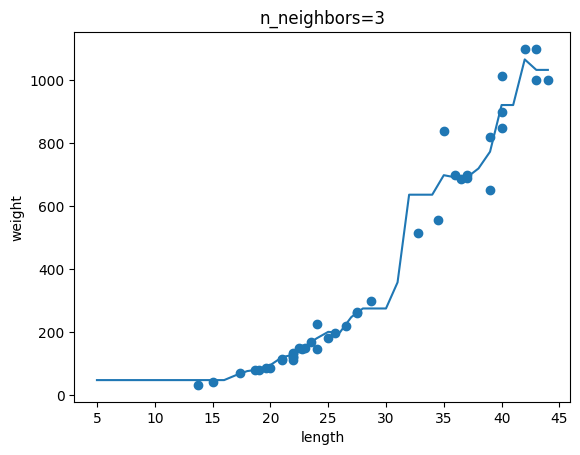

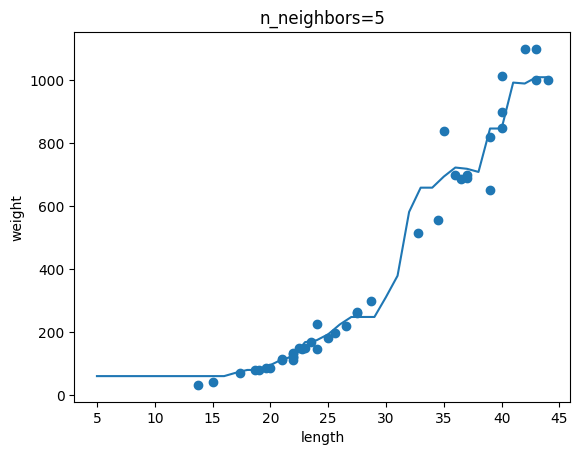

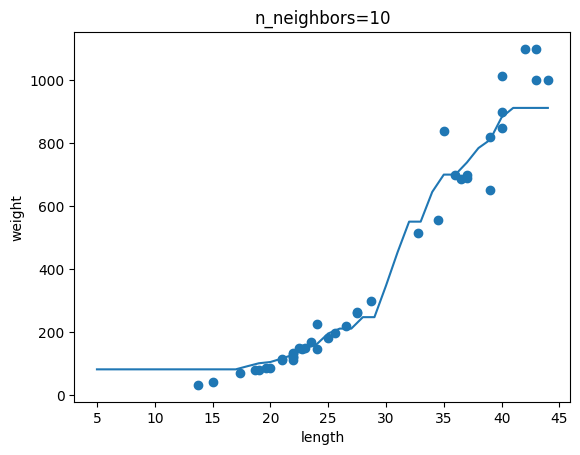

In [27]:
# 앞으로 훈련할 때 하이퍼파라미터(5->3 : 매개변수값)변경으로 좋은 결과를 결정할 때 필수가 됨
# 이것을 보고서에 남겨서 선택한 결과를 표출해야 함
# 그런데 이것을 사람이 값을 수동으로 바꿔가면서 훈련을 하면 시간 낭비가 될 수 있음으로
# 파이썬의 for문 등을 많이 사용한다.
# 하이퍼 파라미터 값은 대부분 홀수를 사용한다. (짝수인 경우에는 답이 잘 나오지 않음.)

knr=KNeighborsRegressor() #k-최근접 이웃 회귀 객체를 만듭니다.
#5에서 45까지 x좌표를 만듭니다.
x=np.arange(5,45).reshape(-1,1)

#n=1,3,5,10일때 예측결과를 그래프로 그립니다.
for n in[1,3,5,10]:
  #모델 훈련
  knr.n_neighbors=n
  knr.fit(train_input, train_target)
  #지정한 범위 x에 대한 예측 구하기
  prediction=knr.predict(x)
  #훈련 세트와 예측 결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

